<div class='alert alert-success'>
    <h1 align="center"> Handwritten digit dataset in Farsi & English</h1> 
     <h1 align="center">   Image classification </h1>
</div>

# Handwritten Farsi digits


Although Farsi is a right to left script, its digits are written from left to righ. HODA dataset has 102,352 digits which extracted from about 12,000 registration forms. 



<img src='./img/digit.png' width='50%'/>

In [1]:
#! pip install scikit-image   # install scikit-image

In [2]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from skimage.transform import resize

This dataset is written with Matlab, one can load it with "scipy".

In [3]:
#load dataset
dataset = io.loadmat('./dataset/Data_hoda_full.mat')

In [4]:
#dataset


This set has 60,000 digit for Training set and 20,000 digits for test set.

In [5]:
#test and training set split
X_train_orginal = np.squeeze(dataset['Data'][:10000])
y_train = np.squeeze(dataset['labels'][:10000])
X_test_original = np.squeeze(dataset['Data'][10000:12000])
y_test = np.squeeze(dataset['labels'][10000:12000])

"squeeze": Remove single-dimensional entries from the shape of an array.

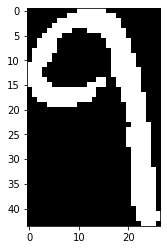

In [6]:
plt.imshow(X_train_orginal[400], cmap='gray')
plt.show()

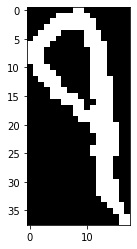

Label of 9000th image is: 9


In [7]:
i=9000
image = X_train_orginal[i]
label = y_train[i]
plt.imshow(image, cmap='gray')
plt.show()
print("Label of {}th image is: {}".format(i, label))

In [8]:
image.shape

(38, 18)

In [9]:
#resize the image from ** to (5,5)
X_train_5by5 = [resize(img, (5, 5)) for img in X_train_orginal]
X_test_5by_5 = [resize(img, (5, 5)) for img in X_test_original]

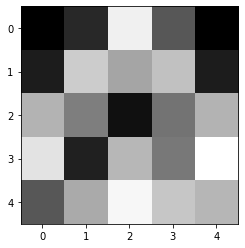

In [10]:
image = X_train_5by5[1]
plt.imshow(image, cmap='gray')
plt.show()

In [11]:
image.shape  

(5, 5)

In [12]:
#reshape
X_train = [x.reshape(25) for x in X_train_5by5]
X_test = [x.reshape(25) for x in X_test_5by_5]

In [13]:
X_train[0].shape

(25,)

**n_neighbor is a hyperparameter which needs to be tuned.**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [15]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

# Predictions and Evaluations

Let's evaluate our **KNN** model!

In [16]:
sample = 24

X = [X_test[sample]]

predicted_class = neigh.predict(X)
actual_class = y_test[sample]

print ("Sample {} is a {}, and you prediction is: {}.".format(sample, actual_class, predicted_class[0]))

Sample 24 is a 2, and you prediction is: 2.


In [17]:
print(neigh.predict_proba(X))

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
y_pred = neigh.predict(X_test)


print("Predicted classes is:")
print(y_pred)
print("==========================================================================")
print("True classes is:")
print(y_test)

Predicted classes is:
[5 8 8 ... 6 8 5]
True classes is:
[5 8 8 ... 6 8 5]


In [19]:
acc = neigh.score(X_test, y_test)
print ("Accuracy is %.3f %%" %(acc*100))

Accuracy is 96.350 %


In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_pred,y_test))

[[216   9   0   0   0   1   0   1   0   0]
 [  3 187   1   0   0   0   0   0   0   0]
 [  0   0 189  11   4   0   1   1   0   1]
 [  0   0   0 166  20   1   0   0   0   0]
 [  0   0   0   3 176   1   0   0   0   0]
 [  0   0   0   0   0 181   1   0   0   0]
 [  0   0   0   0   0   0 206   0   0   6]
 [  1   0   2   0   0   0   0 204   0   0]
 [  0   0   0   0   0   1   0   0 202   0]
 [  0   1   0   0   0   0   1   0   2 200]]


In [22]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

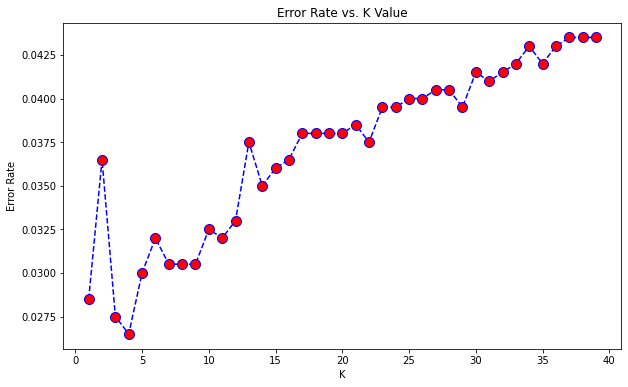

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>4 the error rate just tends to hover around 0.02 Let's retrain the model with that and check the classification report! K=4 is the minimum

In [24]:
# NOW WITH K=4
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



WITH K=4


[[217   2   0   0   0   0   0   1   0   0]
 [  5 191   0   0   0   0   0   0   0   1]
 [  0   1 188   1   0   0   0   2   0   0]
 [  0   0   6 171   3   0   0   0   0   0]
 [  0   0   3  12 185   0   0   0   0   0]
 [  1   0   0   0   1 181   1   0   1   0]
 [  0   0   1   0   0   1 206   0   0   1]
 [  1   0   0   0   0   0   0 205   0   0]
 [  0   0   0   0   0   0   1   0 201   2]
 [  0   0   1   0   0   0   4   0   0 202]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       220
           1       0.98      0.97      0.98       197
           2       0.94      0.98      0.96       192
           3       0.93      0.95      0.94       180
           4       0.98      0.93      0.95       200
           5       0.99      0.98      0.99       185
           6       0.97      0.99      0.98       209
           7       0.99      1.00      0.99       206
           8       1.00      0.99      0.99       204
           9   

**Improved!**

# Neural Networks 

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense,  Activation
import numpy as np

In [27]:
np.random.seed(123)  # for reproducibility

In [30]:
X_train[0]

array([0.54941176, 0.48784314, 0.0172549 , 0.14980392, 0.48196078,
       0.79176471, 0.2627451 , 0.40862745, 0.72117647, 0.3172549 ,
       0.38235294, 0.65686275, 0.8627451 , 0.27058824, 0.00980392,
       0.02235294, 0.62313725, 0.41960784, 0.00862745, 0.        ,
       0.06901961, 0.69058824, 0.09843137, 0.        , 0.        ])

In [31]:
def print_data_info(x_train, y_train, x_test, y_test):
    #Check data Type
    print ("\ttype(x_train): {}".format(type(x_train)))
    print ("\ttype(y_train): {}".format(type(y_train)))

    #check data Shape
    print ("\tx_train.shape: {}".format(np.shape(x_train)))
    print ("\ty_train.shape: {}".format(np.shape(y_train)))
    print ("\tx_test.shape: {}".format(np.shape(x_test)))
    print ("\ty_test.shape: {}".format(np.shape(y_test)))

    #sample data
    print ("\ty_train[0]: {}".format(y_train[0]))

In [34]:
# Preprocess input data for Keras. 
x_train = np.array(X_train)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
x_test = np.array(X_test)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [35]:
print("Before Preprocessing:")
print_data_info(X_train, y_train, X_test, y_test)
print("After Preprocessing:")
print_data_info(X_train, y_train, x_test, y_test)

Before Preprocessing:
	type(x_train): <class 'list'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (10000, 25)
	y_train.shape: (10000, 10)
	x_test.shape: (2000, 25)
	y_test.shape: (2000, 10)
	y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
After Preprocessing:
	type(x_train): <class 'list'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (10000, 25)
	y_train.shape: (10000, 10)
	x_test.shape: (2000, 25)
	y_test.shape: (2000, 10)
	y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [36]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## model architecture

In [37]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 2,314
Trainable params: 2,314
Non-trainable params: 0
_________________________________________________________________


In [38]:
# compile the model 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
model.fit(x_train, y_train,
          epochs=300,
          batch_size=128, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/300
8000/8000 [==============================] - 0s 7us/step - loss: 1.4295 - accuracy: 0.7126 - val_loss: 1.4243 - val_accuracy: 0.7070
Epoch 2/300
8000/8000 [==============================] - 0s 6us/step - loss: 1.4046 - accuracy: 0.7157 - val_loss: 1.4014 - val_accuracy: 0.7010
Epoch 3/300
8000/8000 [==============================] - 0s 6us/step - loss: 1.3810 - accuracy: 0.7179 - val_loss: 1.3782 - val_accuracy: 0.7085
Epoch 4/300
8000/8000 [==============================] - 0s 6us/step - loss: 1.3575 - accuracy: 0.7230 - val_loss: 1.3545 - val_accuracy: 0.7125
Epoch 5/300
8000/8000 [==============================] - 0s 7us/step - loss: 1.3354 - accuracy: 0.7259 - val_loss: 1.3342 - val_accuracy: 0.7135
Epoch 6/300
8000/8000 [==============================] - 0s 7us/step - loss: 1.3141 - accuracy: 0.7259 - val_loss: 1.3112 - val_accuracy: 0.7265
Epoch 7/300
8000/8000 [==============================] - 0s 6us/step - loss: 1.293

Epoch 57/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.6918 - accuracy: 0.8282 - val_loss: 0.6883 - val_accuracy: 0.8245
Epoch 58/300
8000/8000 [==============================] - 0s 7us/step - loss: 0.6852 - accuracy: 0.8282 - val_loss: 0.6802 - val_accuracy: 0.8295
Epoch 59/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.6774 - accuracy: 0.8313 - val_loss: 0.6732 - val_accuracy: 0.8280
Epoch 60/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.6712 - accuracy: 0.8342 - val_loss: 0.6673 - val_accuracy: 0.8310
Epoch 61/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.6643 - accuracy: 0.8330 - val_loss: 0.6600 - val_accuracy: 0.8325
Epoch 62/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.6572 - accuracy: 0.8356 - val_loss: 0.6535 - val_accuracy: 0.8320
Epoch 63/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.6513 - accuracy: 0.8375 - val_loss: 0.6477 -

8000/8000 [==============================] - 0s 6us/step - loss: 0.4372 - accuracy: 0.8764 - val_loss: 0.4292 - val_accuracy: 0.8860
Epoch 114/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.4344 - accuracy: 0.8784 - val_loss: 0.4263 - val_accuracy: 0.8895
Epoch 115/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.4320 - accuracy: 0.8785 - val_loss: 0.4221 - val_accuracy: 0.8890
Epoch 116/300
8000/8000 [==============================] - 0s 7us/step - loss: 0.4293 - accuracy: 0.8790 - val_loss: 0.4224 - val_accuracy: 0.8890
Epoch 117/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.4261 - accuracy: 0.8791 - val_loss: 0.4181 - val_accuracy: 0.8910
Epoch 118/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.4239 - accuracy: 0.8791 - val_loss: 0.4162 - val_accuracy: 0.8935
Epoch 119/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.4218 - accuracy: 0.8804 - val_loss: 0.4125 - val_ac

Epoch 169/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.3305 - accuracy: 0.9021 - val_loss: 0.3238 - val_accuracy: 0.9095
Epoch 170/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.3290 - accuracy: 0.9028 - val_loss: 0.3232 - val_accuracy: 0.9060
Epoch 171/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.3287 - accuracy: 0.9041 - val_loss: 0.3191 - val_accuracy: 0.9060
Epoch 172/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.3270 - accuracy: 0.9021 - val_loss: 0.3197 - val_accuracy: 0.9065
Epoch 173/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.3264 - accuracy: 0.9031 - val_loss: 0.3156 - val_accuracy: 0.9065
Epoch 174/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.3245 - accuracy: 0.9040 - val_loss: 0.3151 - val_accuracy: 0.9070
Epoch 175/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.3231 - accuracy: 0.9049 - val_loss: 0

8000/8000 [==============================] - 0s 6us/step - loss: 0.2763 - accuracy: 0.9184 - val_loss: 0.2691 - val_accuracy: 0.9195
Epoch 225/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.2753 - accuracy: 0.9190 - val_loss: 0.2686 - val_accuracy: 0.9175
Epoch 226/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.2747 - accuracy: 0.9183 - val_loss: 0.2682 - val_accuracy: 0.9225
Epoch 227/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.2739 - accuracy: 0.9199 - val_loss: 0.2663 - val_accuracy: 0.9215
Epoch 228/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.2737 - accuracy: 0.9194 - val_loss: 0.2659 - val_accuracy: 0.9215
Epoch 229/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.2728 - accuracy: 0.9194 - val_loss: 0.2666 - val_accuracy: 0.9210
Epoch 230/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.2726 - accuracy: 0.9199 - val_loss: 0.2649 - val_ac

Epoch 280/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.2430 - accuracy: 0.9279 - val_loss: 0.2381 - val_accuracy: 0.9320
Epoch 281/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.2424 - accuracy: 0.9304 - val_loss: 0.2369 - val_accuracy: 0.9355
Epoch 282/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.2429 - accuracy: 0.9298 - val_loss: 0.2391 - val_accuracy: 0.9335
Epoch 283/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.2417 - accuracy: 0.9311 - val_loss: 0.2375 - val_accuracy: 0.9350
Epoch 284/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.2416 - accuracy: 0.9287 - val_loss: 0.2371 - val_accuracy: 0.9335
Epoch 285/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.2406 - accuracy: 0.9302 - val_loss: 0.2370 - val_accuracy: 0.9330
Epoch 286/300
8000/8000 [==============================] - 0s 6us/step - loss: 0.2405 - accuracy: 0.9298 - val_loss: 0

In [42]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

2000/2000 [==============================] - 0s 10us/step

Testing loss: 0.25, acc: 0.93%


In [44]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test)

predicted:
[5 8 8 ... 6 8 5]
True Label:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
